<a href="https://colab.research.google.com/github/michaeledge27/mathModeling/blob/main/projects/permanentProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
def permRecurse(row, used, mat):
    N = len(mat[0])
    v = 0
    if row == N:
        return 1
    else:
      for j in range(N):
        if (not used[j] and mat[row][j] != 0):
          used[j] = True
          v += permRecurse(row + 1, used, mat)
          used[j] = False
      return v

In [46]:
# return the number of ones in a given matrix
def onesCount(matrix):
    return np.count_nonzero(matrix)

In [47]:
def generate_matrix(n: int, m: int):
    # generate nxn matrix with all 0's
    matrix = np.zeros((n, n), dtype=int)
    options = n**2
    # randomly select m unique indices from the n**2 options
    indices = np.random.choice(options, m, replace=False)
    # replace the selected elements of the 0's matrix with 1's
    np.put(matrix, indices, 1)
    return matrix

# mutation step

In [48]:
def pick_direction(i, j):
    # choose random direction
    direction = np.random.choice(['north', 'south', 'east', 'west'])
    # handle directions accordingly
    if direction == 'north':
        i -= 1
    elif direction == 'south':
        i += 1
    elif direction == 'east':
        j += 1
    elif direction == 'west':
        j -= 1
    return i, j

In [49]:
pick_direction(1, 1)

(2, 1)

In [50]:
# return random i, j indices
def select_element(matrix):
    i = np.random.randint(0, len(matrix))
    j = np.random.randint(0, len(matrix[0]))
    return i, j

In [51]:
# check if 2 elements are the same
def check_same(element, new_element):
    return element == new_element

In [52]:
# return false if at least one of the NSEW neighbors is different
def check_all_neighbors(matrix, i, j):
    size = len(matrix)
    west_neighbor = j - 1 if j > 0 else size - 1
    north_neighbor = i - 1 if i > 0 else size - 1
    south_neighbor = i + 1 if i < size - 1 else 0
    east_neighbor = j + 1 if j < size - 1 else 0
    return matrix[i][j] == west_neighbor and matrix[i][j] == north_neighbor and matrix[i][j] == south_neighbor and matrix[i][j] == east_neighbor


In [53]:
# perform swap on a matrix with old i, j and new i, j values
def perform_swap(matrixA, i, j, new_i, new_j):
    matrixA[i][j], matrixA[new_i][new_j] = matrixA[new_i][new_j], matrixA[i][j]
    return matrixA


In [54]:
# handle the wraparound capabilities if needed
def wraparound_swap(matrixA, i, j, new_i, new_j):
    if new_i < 0:               # check if a north neighbor is chosen on an already upmost index
        new_i = len(matrixA) - 1
    elif new_i >= len(matrixA):  # check if an south neighbor is chosen on an already bottom most index
        new_i = 0

    if new_j < 0:                # check if a west neighbor is chosen on an already leftmost index
        new_j = len(matrixA[0]) - 1
    elif new_j >= len(matrixA[0]):    # check if an east neighbor is chosen on an already rightmost index
        new_j = 0

    matrixA[i][j], matrixA[new_i][new_j] = matrixA[new_i][new_j], matrixA[i][j]
    return matrixA

In [55]:
# perform mutation step
def mutation(matrix):
    # select initial element
    i, j = select_element(matrix)
    # check if all surrounding neighbors are the same in which case skip the mutation step
    if check_all_neighbors(matrix, i, j):
        return matrix
    else:
        # pick random direction
        new_i, new_j = pick_direction(i, j)
        # check if the new direction is the same value as the current index
        if check_same(i, new_i) and check_same(j, new_j):
            return matrix
        # if a swap can be made, perform it
        elif new_i < 0 or new_i >= len(matrix) or new_j < 0 or new_j >= len(matrix[0]):   # perform wraparound if necessary
            return wraparound_swap(matrix, i, j, new_i, new_j)
        else:
            return perform_swap(matrix, i, j, new_i, new_j)   # swap without wraparound


In [56]:
matrix = generate_matrix(8, 20)
matrix

array([[0, 0, 0, 1, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0]])

In [57]:
mutation(matrix)

array([[0, 0, 0, 1, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0]])

# crossover step

In [58]:
# handle wraparound for crossover step
def wraparound_index(index, size):
    return index % size

In [59]:
# take a matrix and turn it into an array
def flatten_matrix(matrix):
    return matrix.flatten()

In [60]:
# perform crossover swap for array A anad B, returning what swap step we are on
def crossover_swap(arrayA, arrayB, index, swap_count, last_swap):
    if arrayA[index] == 0 and arrayB[index] == 1 and last_swap != 1:
        arrayA[index] = 1
        arrayB[index] = 0
        swap_count += 1
        last_swap = 1
    elif arrayA[index] == 1 and arrayB[index] == 0 and last_swap != 2:
        arrayA[index] = 0
        arrayB[index] = 1
        swap_count += 1
        last_swap = 2
    return swap_count, last_swap

In [61]:
# turn the array back into a matrix
def reshape_matrix(array, size):
    return array.reshape(size, size)

In [62]:
# perform crossover step for two matrices
def crossover(matrixA, matrixB):
    attempts = 0
    size = len(matrixA)
    arrayA = flatten_matrix(matrixA)
    arrayB = flatten_matrix(matrixB)
    swap_count = 0  # keep track of what swap we're on
    start_index = np.random.randint(0, size)    # start at a random index
    last_swap = -1          # keep track of last swap
    # only performing two swaps
    while swap_count < 2:
        swap_count, last_swap = crossover_swap(arrayA, arrayB, start_index, swap_count, last_swap)
        attempts +=1
        index = wraparound_index(start_index + 1, size)
        start_index = wraparound_index(start_index + 1, size * size)
        # if looped through matrix without finding swaps break
        if attempts > size * size:
            break

    matrixA = reshape_matrix(arrayA, size)
    matrixB = reshape_matrix(arrayB, size)
    return matrixA, matrixB

In [63]:
for i in range(1000):
  matrixA = generate_matrix(8, 20)
  matrixB = generate_matrix(8, 20)
  matrixA, matrixB = crossover(matrixA, matrixB)
  oneA = onesCount(matrixA)
  oneB = onesCount(matrixB)
  if oneA != oneB:
    print(oneA, oneB)

In [64]:
matrixA = generate_matrix(8, 20)
matrixB = generate_matrix(8, 20)
matrixA, matrixB


(array([[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 0, 0, 1, 0],
        [0, 1, 1, 0, 0, 0, 1, 0],
        [0, 1, 0, 1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 1],
        [0, 1, 1, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0, 1, 1]]),
 array([[1, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 1],
        [1, 0, 1, 1, 1, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 1, 0, 1, 0, 1],
        [0, 1, 0, 0, 1, 0, 0, 0]]))

In [65]:
crossover(matrixA, matrixB)

(array([[0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 1, 0],
        [0, 1, 1, 0, 0, 0, 1, 0],
        [0, 1, 0, 1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 1],
        [0, 1, 1, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0, 1, 1]]),
 array([[1, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 1],
        [1, 0, 1, 1, 1, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 1, 0, 1, 0, 1],
        [0, 1, 0, 0, 1, 0, 0, 0]]))

In [66]:
mat = [[1, 1, 0],
       [1, 1, 0],
       [0, 0, 1]]
N = len(mat[0])
used = [False] * N
v = permRecurse(0, used, mat)
print(v)

2


In [67]:
matrix = generate_matrix(8, 20)
matrix

array([[1, 0, 0, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

In [68]:
N = len(matrix[0])
used = [False] * N
v = permRecurse(0, used, matrix)
print(v)

0


In [69]:
def calculate_max_perm(n, m, trials):
  permanents = []
  for i in range(trials):
    matrix = generate_matrix(n, m)
    N = len(matrix[0])
    used = [False] * N
    v = permRecurse(0, used, matrix)
    permanents.append(v)
  return max(permanents)


In [70]:
calculate_max_perm(8, 20, 1000)

10

# genetic algorithm solution

In [71]:
def chromosones(n: int, m: int, population: int):
    # create a list of chromosones (nxn 0/1 matrices having m 1's)
    total_population = []
    # generate the population size # of chromosones
    for i in range(population):
        # generate nxn matrix with m 1's
        matrix = generate_matrix(n, m)
        total_population.append(matrix)
    # return sorted population by highest permanent to lowest
    order = []
    for chro in total_population:
      perm = permRecurse(0, [False] * len(chro[0]), chro)
      order.append((perm, chro))
    order.sort(key=lambda item: item[0], reverse=True)
    return order

In [72]:
chromosones(8, 20, 4)

[(2,
  array([[1, 0, 1, 1, 1, 0, 1, 0],
         [0, 0, 0, 0, 0, 1, 0, 0],
         [1, 0, 1, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 1, 0, 1, 1],
         [0, 0, 0, 0, 0, 0, 0, 1],
         [0, 1, 0, 0, 1, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 1, 1, 0, 0, 0]])),
 (0,
  array([[0, 1, 0, 0, 0, 1, 1, 0],
         [0, 1, 0, 0, 1, 0, 0, 0],
         [1, 0, 0, 0, 1, 0, 1, 1],
         [0, 0, 0, 0, 0, 0, 0, 1],
         [0, 1, 0, 1, 0, 1, 0, 0],
         [0, 1, 1, 1, 0, 0, 1, 0],
         [0, 0, 0, 0, 0, 0, 0, 1],
         [0, 0, 0, 1, 0, 1, 0, 0]])),
 (0,
  array([[1, 1, 0, 0, 0, 1, 0, 0],
         [0, 1, 0, 0, 0, 1, 1, 0],
         [0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, 1, 1, 1, 0, 1],
         [0, 0, 0, 1, 0, 1, 0, 0],
         [1, 0, 0, 0, 0, 0, 0, 1],
         [0, 1, 1, 0, 0, 1, 0, 0],
         [0, 1, 0, 0, 0, 0, 1, 0]])),
 (0,
  array([[0, 0, 1, 0, 0, 0, 0, 0],
         [0, 1, 1, 1, 1, 0, 0, 1],
         [0, 1, 1, 0, 0, 1, 0, 0],
         [0, 0, 0, 0, 0, 0

In [73]:
def select_parents(population):
    midpoint = len(population) // 2
    parent_options = population[:midpoint]
    # extract indices
    parent_indices = np.random.choice(len(parent_options), 2, replace=False)
    # get parents using indices
    parents = [parent_options[i] for i in parent_indices]
    return parents

In [74]:
select_parents(chromosones(8, 20, 12))

[(0,
  array([[0, 0, 0, 0, 0, 0, 0, 0],
         [1, 0, 0, 0, 0, 0, 0, 0],
         [1, 0, 1, 0, 1, 1, 1, 1],
         [0, 0, 0, 1, 1, 1, 0, 0],
         [0, 0, 0, 1, 0, 0, 0, 1],
         [1, 0, 0, 1, 0, 0, 0, 0],
         [1, 0, 1, 1, 1, 0, 0, 0],
         [0, 0, 1, 1, 0, 0, 0, 0]])),
 (0,
  array([[0, 0, 0, 0, 1, 1, 0, 1],
         [0, 0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0, 1],
         [0, 1, 0, 1, 1, 1, 0, 1],
         [0, 1, 0, 0, 0, 0, 0, 0],
         [1, 1, 0, 1, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 1, 0, 0],
         [1, 0, 1, 0, 1, 0, 0, 0]]))]

In [75]:
def mutate_or_crossover():
    return np.random.choice(['mutate', 'crossover'], p=[0.5, 0.5])

In [78]:
def max_perm(trials):
    permanent_values = []
    for i in range(trials):
        matrixA = generate_matrix(8, 20)
        matrixB = generate_matrix(8, 20)
        if mutate_or_crossover() == 'mutate':
            matrixA = mutation(matrixA)
            matrixB = mutation(matrixB)
            APerm = permRecurse(0, [False] * len(matrixA[0]), matrixA)
            BPerm = permRecurse(0, [False] * len(matrixB[0]), matrixB)
            if APerm > BPerm:
                permanent_values.append((APerm, matrixA))
            else:
                permanent_values.append((BPerm, matrixB))
        else:
            matrixA, matrixB = crossover(matrixA, matrixB)
            APerm = permRecurse(0, [False] * len(matrixA[0]), matrixA)
            BPerm = permRecurse(0, [False] * len(matrixB[0]), matrixB)
            if APerm > BPerm:
                permanent_values.append((APerm, matrixA))
            else:
                permanent_values.append((BPerm, matrixB))
    return max(permanent_values, key=lambda item: item[0])


In [79]:
max_perm(1000)

(12,
 array([[0, 0, 0, 0, 0, 0, 1, 1],
        [1, 0, 1, 1, 0, 0, 1, 0],
        [1, 1, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 0, 1, 1, 0],
        [1, 0, 1, 0, 0, 0, 1, 0]]))

In [87]:
def simulation(trials):
    permanent_values = []
    old_max = 0
    for i in range(trials):
        current_max, matrix = max_perm(100)
        if current_max > old_max:
            old_max = current_max
            permanent_values.append((current_max, matrix))

    plt.plot([item[0] for item in permanent_values])
    plt.show()
    return max(permanent_values, key=lambda item: item[0])

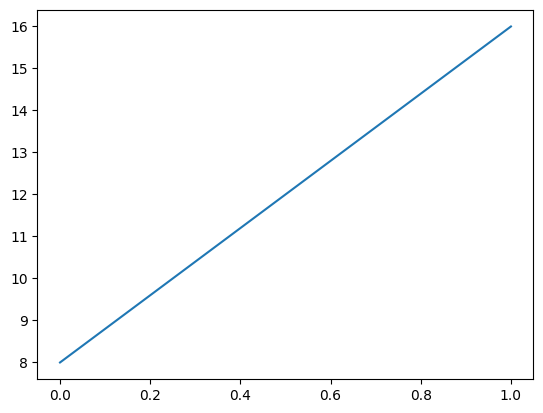

(16,
 array([[1, 0, 1, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 1, 1, 0],
        [1, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [1, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 1, 1, 0]]))

In [88]:
simulation(100)